LIBRARIES

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle
from sklearn import preprocessing

In [19]:
df=pd.read_csv('../Data/clean_FB.csv') # read the Cleaned data
print(df.head())

                         Time  Protocol  Length        DT  source port  \
0  2021-12-12 19:24:54.113588        10      66  0.147364        443.0   
1  2021-12-12 19:24:54.215187        12     281  0.101599        443.0   
2  2021-12-12 19:24:57.467081        10      66  0.151991        443.0   
3  2021-12-12 19:24:57.629709        12     283  0.162628        443.0   
4  2021-12-12 19:24:58.846692        10      66  0.011171        443.0   

     Absolute Time  Cumulative Bytes  
0  00:24:54.113588               894  
1  00:24:54.215187              1175  
2  00:24:57.467081              1727  
3  00:24:57.629709              2010  
4  00:24:58.846692              2336  


ALGORITHM

In [20]:
X=df[['Protocol','Length','DT','Cumulative Bytes']].values # Features 
y=df['source port'].values # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # 20% test data

classifier = KNeighborsClassifier(n_neighbors=5) # KNN object
classifier.fit(X_train, y_train) # Fit the KNN object to the training data

y_pred = classifier.predict(X_test) # Predict the test data

print(confusion_matrix(y_test, y_pred)) # Confusion Matrix
print(classification_report(y_test, y_pred)) # Classification Report

[[ 9468  1980   142     0     0     0]
 [ 1055  4557     0     0     0     0]
 [   77     1  6399     0     0     0]
 [    0     0     1  5909     0     0]
 [    0     0     0     0  9031     0]
 [    0     0     0     0     0 11503]]
              precision    recall  f1-score   support

       443.0       0.89      0.82      0.85     11590
     41983.0       0.70      0.81      0.75      5612
     42113.0       0.98      0.99      0.98      6477
     42203.0       1.00      1.00      1.00      5910
     42565.0       1.00      1.00      1.00      9031
     42806.0       1.00      1.00      1.00     11503

    accuracy                           0.94     50123
   macro avg       0.93      0.94      0.93     50123
weighted avg       0.94      0.94      0.94     50123



SAVING MODEL

In [21]:
filename = 'KNN.sav' 
pickle.dump(classifier , open(filename, 'wb')) # Save the model

TESTING ON REAL DATA

In [22]:
df4=pd.read_csv('../Data/Youtube.csv')
df4.drop('No.',axis=1,inplace=True)
label_encoder = preprocessing.LabelEncoder()
df4=df4[~df4['source port'].isnull()].copy()
df4.isnull().sum()
df4['Protocol']=label_encoder.fit_transform(df4['Protocol'])
print(df4.head())

                         Time  Protocol  Length        DT  source port  \
0  2021-12-12 18:49:13.901896         0      83  0.000000      46267.0   
1  2021-12-12 18:49:13.919080         0      99  0.017184         53.0   
2  2021-12-12 18:49:13.932882         5    1392  0.013802      44589.0   
3  2021-12-12 18:49:13.976489         5      84  0.043607        443.0   
4  2021-12-12 18:49:14.185215         5    1392  0.208726        443.0   

     Absolute Time  Cumulative Bytes  Frequency  TX Delay  Relative Time  \
0  23:49:13.901896                83        NaN       NaN       0.000000   
1  23:49:13.919080               182        NaN       NaN       0.017184   
2  23:49:13.932882              1574        NaN       NaN       0.030986   
3  23:49:13.976489              1658        NaN       NaN       0.074593   
4  23:49:14.185215              3050        NaN       NaN       0.283319   

                                          New Column  
0    Standard query 0xd353 A youtubei.googl

In [23]:
X2=df4[['Protocol','Length','DT','Cumulative Bytes']].values
loaded_model = pickle.load(open(filename, 'rb')) # Load the model 
Result = loaded_model.predict(X2) # Predict the test data


In [24]:
df4['Predict'] = Result # Add the predicted data to the dataframe

<AxesSubplot:ylabel='Predict'>

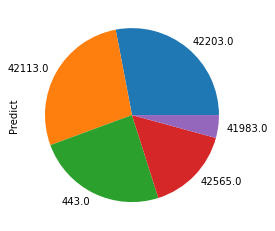

In [25]:
df4['Predict'].value_counts().plot(kind='pie') # Predicted

<AxesSubplot:ylabel='source port'>

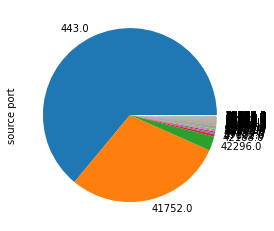

In [26]:
df4['source port'].value_counts().plot(kind='pie') # Actual Port distribution